# Sprint 6 T01

- Exploro el dataset para familiarizarme con él

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.stats.diagnostic as dg
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
cabecera = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
HData = pd.read_csv('C:\\Juan\\ITAcademy\\Sprint_5\\housing data.csv', encoding='ISO-8859-1', 
                    header = None, names = cabecera)

#### Explicación variables

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per USD 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in USD 1000's

In [2]:
HData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
HData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
HData.duplicated().sum()

0

In [5]:
round(HData.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [6]:
HData.shape

(506, 14)

In [7]:
HData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Variable de respuesta**

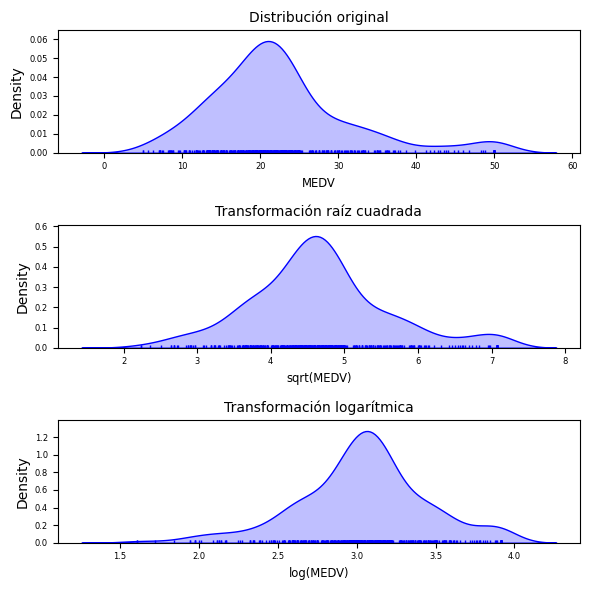

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    HData['MEDV'],
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    HData['MEDV'],
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('MEDV', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(HData['MEDV']),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(HData['MEDV']),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(MEDV)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(HData['MEDV']),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(HData['MEDV']),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(MEDV)', fontsize='small') 
axes[2].tick_params(labelsize = 6)


fig.tight_layout()

- Una transformación de raíz cuadrada para MEDV reduce su sesgo positivo y la aproxima a una normal. 

**Variables predictoras**

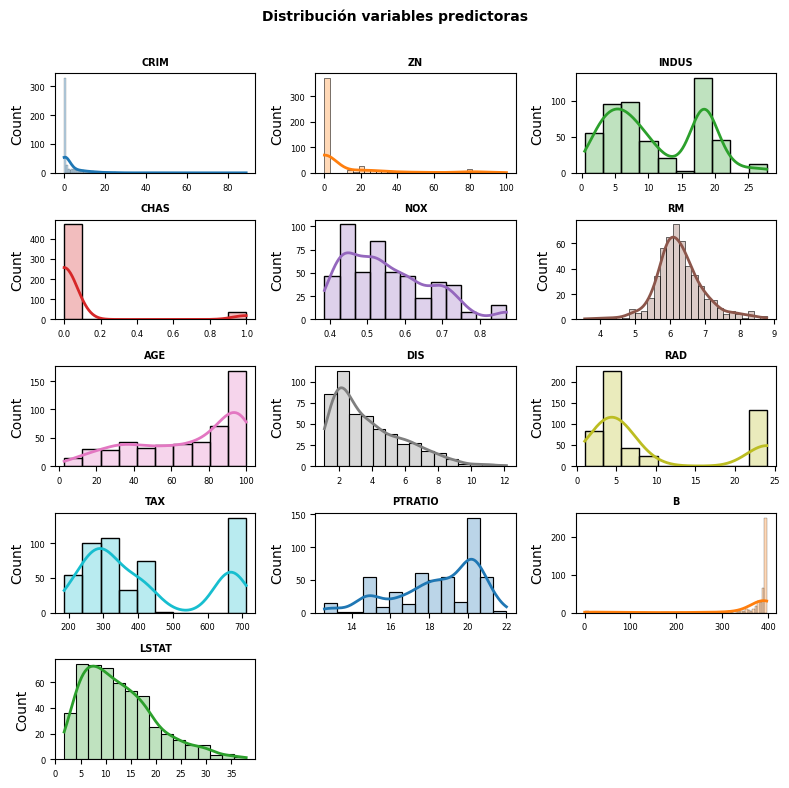

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8, 8))
axes = axes.flat
columnas_numeric = HData.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('MEDV')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = HData,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
for i in [13,14]:
    fig.delaxes(axes[i])
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables predictoras', fontsize = 10, fontweight = "bold");

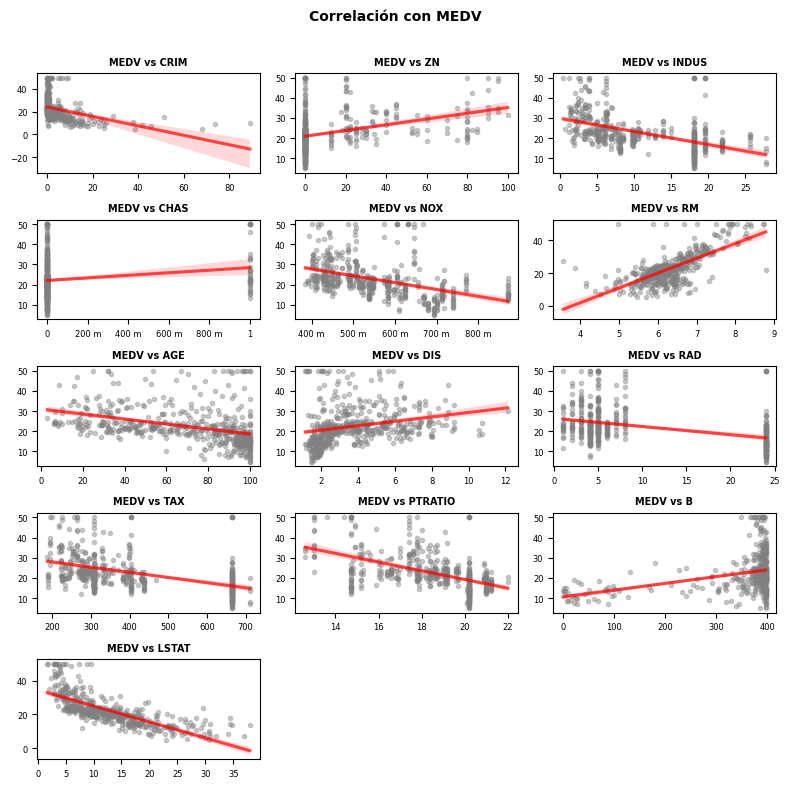

In [10]:
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(8, 8))
axes = axes.flat
columnas_numeric = HData.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('MEDV')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = HData[colum],
        y           = HData['MEDV'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"MEDV vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [13,14]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con MEDV', fontsize = 10, fontweight = "bold");

In [11]:
print('CHAS es una variable categórica','\n',HData.CHAS.value_counts())

CHAS es una variable categórica 
 0    471
1     35
Name: CHAS, dtype: int64


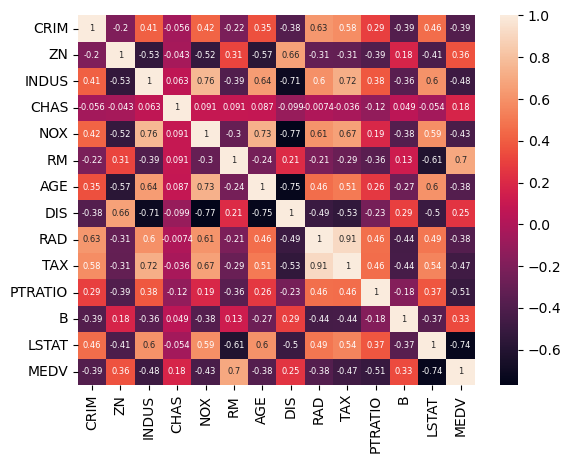

In [12]:
sns.heatmap(HData.corr(),annot = True, annot_kws = {'size': 6})
plt.show()

# Ejercicio 1

#### Regresión lineal simple

- MEDV tiene una correlación "alta" con LSTAT, RM y PTratio.  
- El primer modelo lo correré con una variable independiente. Seleccionaré LSTAT porque es la que tiene mayor correlación con MEDV y porque ambas tienen un sesgo positivo que se reduce con una transformación de raíz cuadrada. 

In [13]:
X=HData['LSTAT']
y=HData['MEDV']

In [14]:
corr_test = pearsonr(X , y )
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.7376627261740146
P-value:  5.081103394389417e-88


- El gráfico de dispersión (abajo, tercera línea) y el test de correlación muestran una relación de intensidad considerable (r = 0.74) y significativa (p-value = casi cero). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el precio de la vivienda (MEDV) en función del estatus de la población (LSTAT). 

- Tanto LSTAT como MEDV tienen un sesgo positivo no muy pronunciado, por ello voy a hacer una transformación con la raíz cuadrada para centrar ambas distribuciones. 

In [15]:
Xs = np.sqrt(X)
ys = np.sqrt(y)

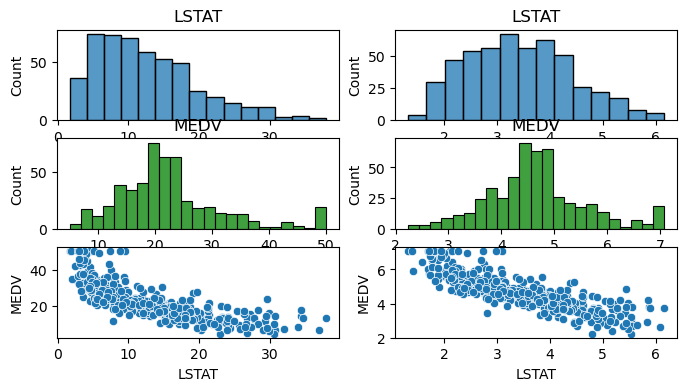

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 4))
sns.histplot(HData['MEDV'], ax=axes[1, 0], color= 'g').set_title('MEDV')
sns.histplot(ys, ax=axes[1, 1], color= 'g').set_title('MEDV')
sns.histplot(HData['LSTAT'], ax=axes[0, 0]).set_title('LSTAT')
sns.histplot(Xs, ax=axes[0, 1]).set_title('LSTAT')
sns.scatterplot(x = HData['LSTAT'], y = HData['MEDV'], data = HData, ax=axes[2, 0])
sns.scatterplot(x = np.sqrt(X), y = np.sqrt(y), ax=axes[2, 1])
plt.show()

In [17]:
Xs = sm.add_constant(Xs)
Mod_OLS = sm.OLS(ys,Xs)
resultados = Mod_OLS.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1006.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.42e-122
Time:                        09:09:45   Log-Likelihood:                -406.49
No. Observations:                 506   AIC:                             817.0
Df Residuals:                     504   BIC:                             825.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2996      0.087     84.086      0.000       7.129       7.470
LSTAT         -0.7741      0.024    -31.721      0.000      -0.822      -0.726
==============================================================================
Omnibus:                       59.581   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.603
Skew:                           0.809   Prob(JB):                     1.56e-19
Kurtosis:                       4.220   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Establecemos las hipótesis Ho: B2 = 0 (variable x no influye en Y) y H1: B2 != 0 (x tiene un impacto sgnificativo en Y) 
- El valor P para ambos parámetros es aproximadamente "0" por lo que podemos rechazar la hipótesis nula y conluir que x está relacionada con y. Los intervalos de confianza no pasan por el "0" también rechazamos la hipótesis nula. 
- La probabilidad de F>1006 es apóximadamente "0" así que nuevamente rechazamos la hipótesis nula. 
- Podemos afirmar que x tiene un impacto significativo a nivel estadístico sobre y. El estatus de la población puede ser un buen candidato para explicar el precio de la vivienda.  

- El valor de 𝑏₀ indica que el modelo predice que cuando el % de población de menor estaus es cero, el valor medio de la vivienda es 7.2996 (al cudrado). El valor de 𝑏₁ = -0.7741 significa que el valor de la vivienda se reduce en 0.77 cuando el % de población de menor status se incrementa en 1%.

### Diagnóstico modelo de regresión

- Una vez comprobado que los coeficientes son significativos, tendremos que comprobar que se cumplen una serie de supuestos necesarios para que el modelo sea válido. 

##### Supuesto linealidad

In [18]:
reset = dg.linear_reset(resultados, power = 4, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", round(reset.fvalue, 4))
print("P Value: ", round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  16.3259
P Value:  0.0


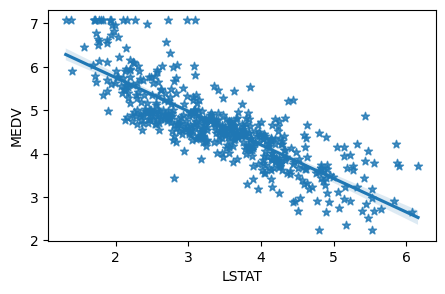

In [19]:
plt.figure(figsize = (5,3))
sns.regplot(x = np.sqrt(X), y = np.sqrt(y), marker = '*')
plt.show()

- Le modelo no supera la prueba de linealidad de Ramsey, al ser P < a 0,05 se rechaza Ho: el modelo es probablemente lineal (está bien especificado). 
- Por otro lado en el diagrama de dispersión se observa que la distribución de los puntos correspondientes a MEDV y LSTAT caen, de forma aproximada, a lo largo de una línea.

##### Supuesto homocedasticidad

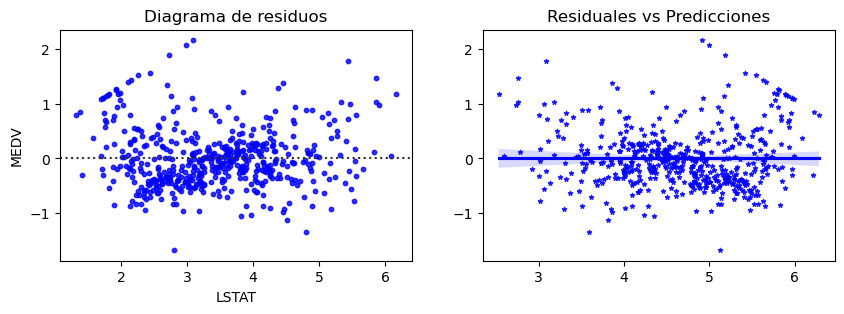

In [20]:
predicciones = resultados.predict(Xs)
residuales = resultados.resid

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
sns.regplot(x=predicciones, y=residuales, marker='*', scatter_kws={'s': 10}, color='b'
            ,ax=axes[1]).set_title('Residuales vs Predicciones', size=12)
sns.residplot(x=np.sqrt(X), y=np.sqrt(y), scatter_kws={"s": 10}, color='b'
              ,ax=axes[0]).set_title('Diagrama de residuos', size=12)
plt.show()

- Homocedasticidad significa que los residuos deben distribuirse de forma homogénea para todos los valores de la variable de predicción. En el digrama de residuos vemos que estos se distribuyen de forma aleatoria, tienen puntos similares en todo el rango de observaciones de la variable MEDV, no se ve relación alguna. 
- Si hay una evidene forma de un embudo en el gráfico de Residuales vs Predicciones, puede considerarse como un signo de varianza no constante, es decir, de heterocedasticidad. En este caso el embudo es mínimo. 
- Viendo ambos gráficos, puedo aceptar el suspuesto de homocedasticidad.  

##### Supuesto normalidad

In [21]:
stat, p = shapiro(residuales)
print('p=%.3f' % p)
if p > 0.05:
 print('Es probable que se distribuya como normal')
else:
 print('Es probable que no se distribuya como normal')

p=0.000
Es probable que no se distribuya como normal


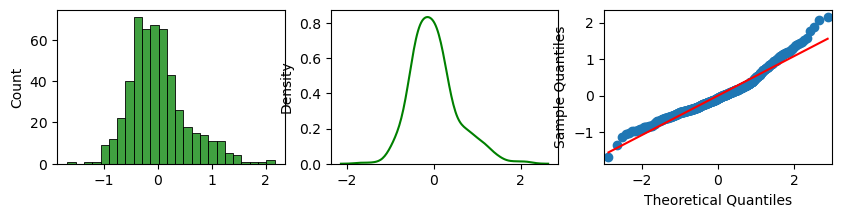

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
sns.histplot(residuales, ax=axes[0], color= 'g')
sns.kdeplot(residuales, ax=axes[1], color= 'g')
qqplot(residuales, line='s', ax=axes[2]) 
plt.show()

- Los residuos del modelo han de distribuirse como normal. Al realizar la prueba de Shapiro-Wilk de normalidad, aceptamos la hipótesis alternativa H1 = es probable que los residuos no se distribuyan como normal. 
- Por otro lado se observa una distribución cercana a la normal en el histograma y el gráfico de densidad. También el gráfico de probabilidad muestra que los residuos se ajustan a la línea normal. 

##### Supuesto de independencia

In [23]:
print("El estadístico de Durbin Watson es",round(durbin_watson(residuales),3))

El estadístico de Durbin Watson es 0.896


- El estadístico de Durbin Watson es menor que 1,5. Indica que probablemente existe una correlación serial negativa entre los residuales de mi modelo, no son independientes.
- *Qué podemos hacer?*

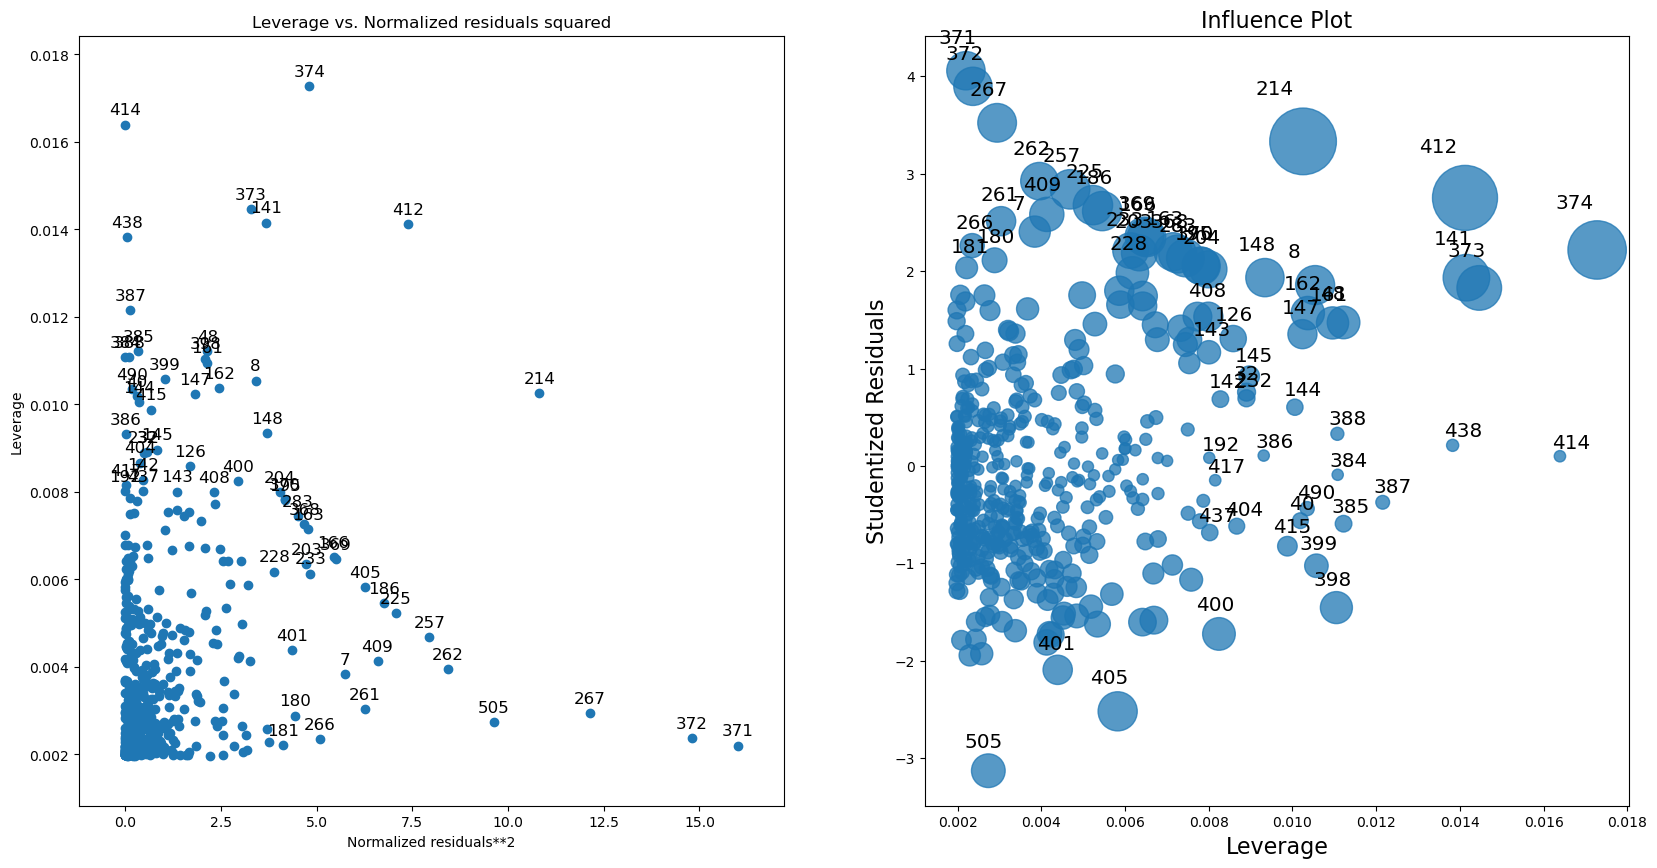

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sm.graphics.plot_leverage_resid2(resultados, ax=axes[0])
sm.graphics.influence_plot(resultados,ax=axes[1])
plt.show()

- El apalancamiento (Hat Value o  la influencia que la observación tiene sobre la línea de regresión) nos ayuda a localizar puntos de datos anormales en relación con las variables independientes. Trazar el apalancamiento frente a los residuos normalizados al cuadrado, es un medio para identificar valores atípicos. En el gráfico ya se pueden identificar los valores atípicos pero no se ve con claridad su apalacamineto. 
- El gráfico de residuos estudentizados cuantifica lo grandes que son los residuos en unidades de desviación estándar. Una observación con un Studentized Residual >  3 (en valor absoluto) generalmente se considera un valor atípico. 
- Remover estas observaciones (atípicas con mayor influencia), (tipo: 412, 214 o 374) más algunas otras que se aprecian en la gráfica de residuos estandarizados, es una forma de buscar unos residuales independientes, reducir la disperción y centrar las distribuciones. 

### Regresión lineal múltiple

- Analizo la variable RM (habitaciones promedio por vivienda) 

In [25]:
X= HData['LSTAT']
y= HData['MEDV']
Z= HData['RM']
corr_test = pearsonr(Z , y )
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6953599470715388
P-value:  2.4872288710088567e-74


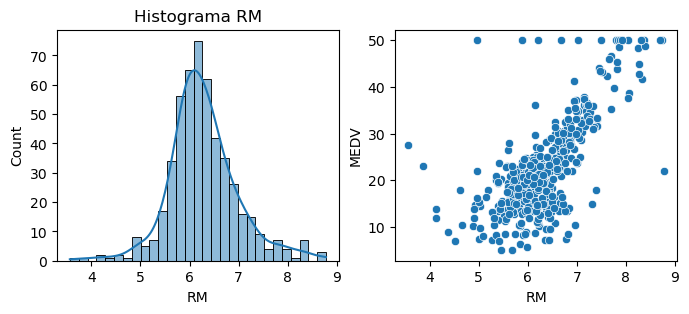

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sns.histplot(Z, ax=axes[0], kde = True,).set_title('Histograma RM', size = 12)
sns.scatterplot(x = HData['RM'], y = HData['MEDV'], data = HData, ax=axes[1])
plt.show()

- El histograma de RM (Habitaciones promedio por vivienda) muestra una distribución similar a la normal. Por otro lado, el gráfico de dispersión y el coeficiente de correlación muestran una relación de intensidad considerable (r = 0.695) y significativa (p-value = casi cero). 
- Tiene sentido interntar generar un modelo de regresión con el objetivo de predecir el precio de la vivienda (MEDV) en función del número promedio de habitaciones por vivienda (RM) y del estatus de la población (LSTAT) que ya conocemos. 

In [27]:
HData_sq = HData[['MEDV','RM','LSTAT']]

In [28]:
HData_sq['MEDVsq']=np.sqrt(HData['MEDV'])
HData_sq['LSTATsq']=np.sqrt(HData['LSTAT'])

- Hago una transformación con la raíz cuadrada de MEDV y LSTAT, así centro sus distribuciones (si dejo las variables sin transformar, la intercepción del modelo me sale no significativa (P>0.05)) 

In [29]:
Xm = HData_sq[['RM','LSTATsq']]
ym = HData_sq['MEDVsq']

In [30]:
Xm = sm.add_constant(Xm, prepend=True)
modelo_M = sm.OLS(endog=ym, exog=Xm)
modelo_M = modelo_M.fit()
print(modelo_M.summary())

                            OLS Regression Results                            
Dep. Variable:                 MEDVsq   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     596.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.60e-133
Time:                        09:09:48   Log-Likelihood:                -376.54
No. Observations:                 506   AIC:                             759.1
Df Residuals:                     503   BIC:                             771.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6580      0.342     13.612      0.0

- Establecemos las hipótesis Ho: B2 = 0 (variable x no influye en Y) y H1: B2 != 0 (x tiene un impacto sgnificativo en Y) 
- El valor P para ambos parámetros y la intercepción es aproximadamente "0" por lo que podemos rechazar la hipótesis nula y conluir que x está relacionada con y. Los intervalos de confianza no pasan por el "0" también rechazamos la hipótesis nula. 
- La probabilidad de F>596.8 es apóximadamente "0" así que nuevamente rechazamos la hipótesis nula. 
- Podemos afirmar que x tiene un impacto significativo a nivel estadístico sobre y. El estatus de la población y el número promedio de habitaciones por vivienda pueden ser buenos candidatos para explicar el precio de la vivienda.

### Diagnóstico modelo de regresión

- ##### Supuesto linealidad

In [31]:
reset = dg.linear_reset(modelo_M, test_type = 'fitted', use_f = True, )
print("Ramsey RESET test \n ")
print("F Statistic: ", round(reset.fvalue, 4))
print("P Value: ", round(reset.pvalue, 4))

Ramsey RESET test 
 
F Statistic:  31.5863
P Value:  0.0


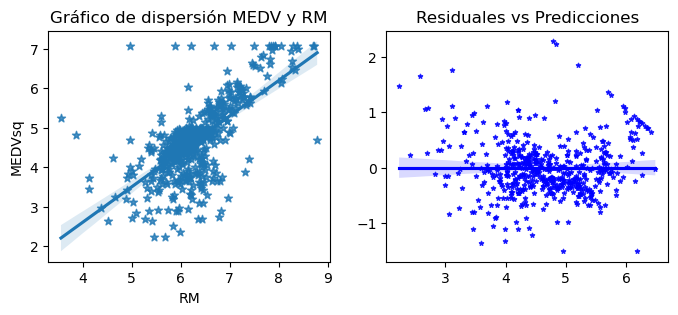

In [32]:
predic_M = modelo_M.predict(Xm)
residual_M = modelo_M.resid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sns.regplot(x = HData_sq['RM'], y = HData_sq['MEDVsq'], 
            marker = '*',ax=axes[0]).set_title("Gráfico de dispersión MEDV y RM", size=12)
sns.regplot(x=predic_M, y=residual_M, marker='*', 
            scatter_kws={'s': 10}, color='b',ax=axes[1]).set_title('Residuales vs Predicciones', size=12)
plt.show()

- Le modelo no supera la prueba de linealidad de Ramsey, el modelo es probablemente no lineal. 
- Por otro lado en el diagrama de dispersión se observa que la distribución de los puntos correspondientes a MEDV y LSTAT caen, de forma aproximada, a lo largo de una línea. En el gráfico de residuales se observa que no existe relación entre residuales y valores predichos, caen de forma aleatoria, esto es inidcativo de poder aceptar linealidad. 

- ##### Supuesto homocedasticidad

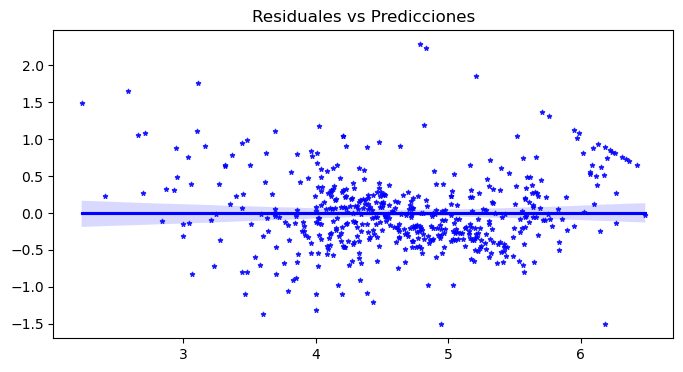

In [33]:
plt.figure(figsize = (8,4))
sns.regplot(x=predic_M, y=residual_M, marker='*', 
            scatter_kws={'s': 10}, color='b').set_title('Residuales vs Predicciones', size=12)
plt.show()

- En el digrama de residuos vs predicciones vemos que se distribuyen de forma aleatoria, tienen puntos similares en todo el rango de observaciones de la variable MEDV, no se aprecia relación alguna. 
- En el mismo gráfico se aprecia que la magnitud de los errores (la sombra) mantiene una forma constante, no presenta forma alguna tipo embudo, esto se considera como varianza constante por lo que puedo aceptar el supuesto de homocedasticidad. 

- ##### Supuesto de multicolinealidad

La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Para verificar la magnitud de esta relación se usa el valor VIF (Variance Inflation Factor)

In [34]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xm.values, i) for i in range(Xm.shape[1])]
vif["coef"] = Xm.columns

In [35]:
vif.round(1)

,VIF Factor,coef
0,227.1,const
1,1.7,RM
2,1.7,LSTATsq


- Un VIF de 1 significa que no existe correlación entre variables explicativas. De 1 a 5 indica una correlación moderada y mayor a 5 indicaría una correlación severa y haría poco fiables el valor de los coeficientes y los valores P. 
- Nuestras variables explicativas tienen un VIF de 1.7 por lo que podemos aceptar ausencia de multicolinealidad, no existe colinealidad entre los predictores. 

- ##### Supuesto normalidad

In [36]:
stat, p = shapiro(residual_M)
print('p=%.3f' % p)
if p > 0.05:
 print('Es probable que se distribuya como normal')
else:
 print('Es probable que no se distribuya como normal')

p=0.000
Es probable que no se distribuya como normal


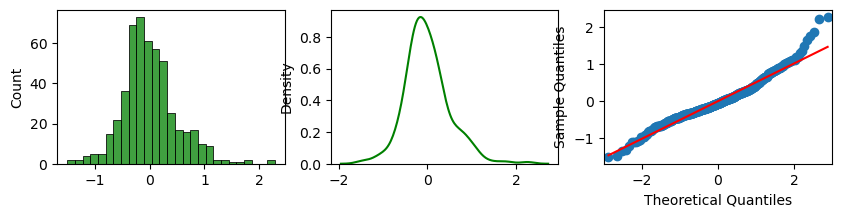

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))
sns.histplot(residual_M, ax=axes[0], color= 'g')
sns.kdeplot(residual_M, ax=axes[1], color= 'g')
qqplot(residual_M, line='s', ax=axes[2]) 
plt.show()

- Con la prueba de Shapiro-Wilk de normalidad, aceptamos que los residuales del modelo probablemente no se distribuyen como normal.  
- Al mismo tiempo se observa una distribución cercana a la normal en el histograma y el gráfico de densidad. También el gráfico de probabilidad muestra que los residuos se ajustan a la línea normal.

- ##### Supuesto de independencia

In [38]:
print("El estadístico de Durbin Watson es",round(durbin_watson(residual_M),3))

El estadístico de Durbin Watson es 0.835


- El estadístico de Durbin Watson es menor que 1,5. Indica que probablemente existe una correlación serial negativa entre los residuales de mi modelo, no son independientes.

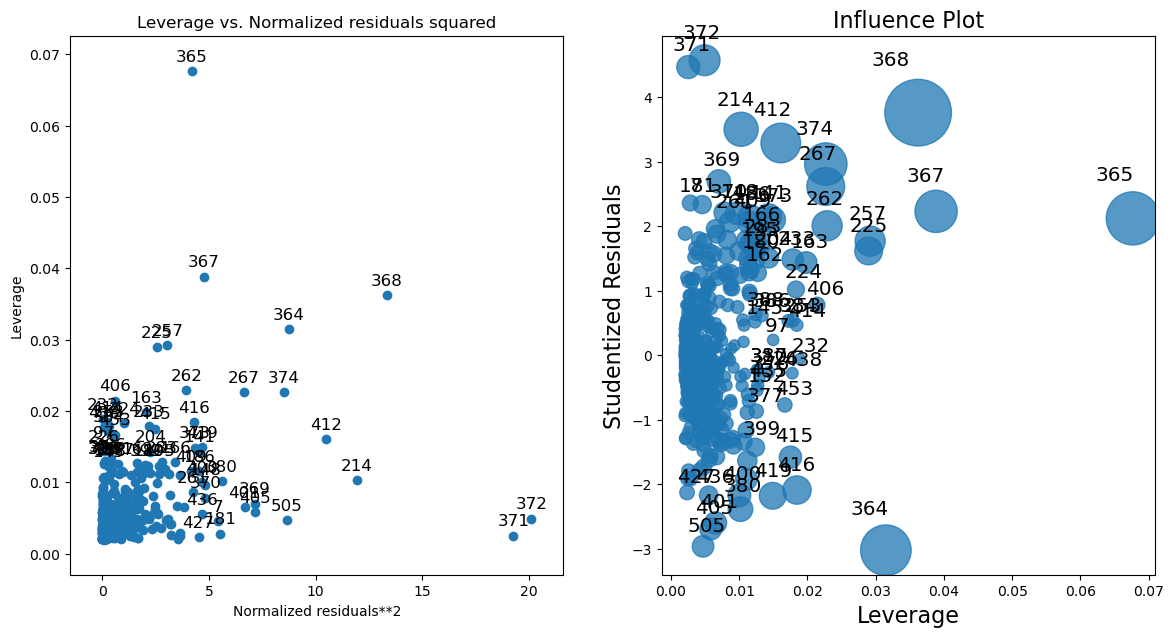

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
sm.graphics.plot_leverage_resid2(modelo_M, ax=axes[0])
sm.graphics.influence_plot(modelo_M,ax=axes[1])
plt.show()

- Al identificar las observaciones que son tanto atípicas como con un alto apalancamineto, podemos remover las observaciones atípicas con mayor influencia (tipo: 368, 365 o 364) más algunas otras que se aprecian en la gráfica de residuos estandarizados, es una forma de buscar unos residuales independientes y centrar las distribuciones de los datos.

## Ejercicio 2

- Modelo regresión simple 

In [40]:
from sklearn.metrics import mean_absolute_error as mae 
print(f"MSE  = {mean_squared_error(ys, predicciones):6.3f}")
print(f"RMSE = {mean_squared_error(ys, predicciones, squared = False):6.3f}")
print(f"R2   = {r2_score(ys, predicciones):6.3f}")
print(f"MAE  = {mae(ys, predicciones):6.3f}")

MSE  =  0.292
RMSE =  0.540
R2   =  0.666
MAE  =  0.409


 - Modelo regresión múltiple

In [41]:
print(f"MSE  = {mean_squared_error(ym, predic_M):6.3f}")
print(f"RMSE = {mean_squared_error(ym, predic_M, squared = False):6.3f}")
print(f"R2   = {r2_score(ym, predic_M):6.3f}")
print(f"MAE  = {mae(ym, predic_M):6.3f}")

MSE  =  0.259
RMSE =  0.509
R2   =  0.704
MAE  =  0.380


- La R2 en el modelo de regresión simple es 0.666 y en el múltiple de 0.704. El modelo de regresión múltiple explica mayor parte de la variación de MEDV, por tanto es preferible para predecirla. 
- Las observaciones del modelo de regresión múltiple están más cerca de la línea de regresión que las del modelo de regresión simple. El error cuadrático medio del modelo múltiple (MSE: 0.259) es menor que el del modelo simple, 0.292.  
- Las predicciones del modelo múltiple se alejan en promedio 0.509 unidades del valor real en el modelo, menos que las 0.540 de modelo simple de acuerdo a sus RMSE. 
- El error absuloto medio (MAE) del modelo múltilpe (0.380) es menor que en el modelo lineal (0.409). La diferencia media entre observaciones pronosticadas y reales es menor en el modelo múltiple.  
- Según estos indicadores, el modelo de regresión múltiple es mejor para predecir MEDV que el modelo simple. 

## Ejercicio 3

### **Modelo regresión simple**

- Borro 16 observaciones identificadas (ejercicio 1) como atípicas y de alta influencia buscando mejorar la capacidad de predicción del modelo. 

In [42]:
Xs = np.sqrt(X)
ys = np.sqrt(y)

Xs_atip= Xs.drop([374,412,214,371,372,267,398,400,405,505,414,438,162,147,148,401], axis=0, inplace=False)
ys_atip= ys.drop([374,412,214,371,372,267,398,400,405,505,414,438,162,147,148,401], axis=0, inplace=False)

In [43]:
Xs_atip = sm.add_constant(Xs_atip)
modeloS_atip = sm.OLS(ys_atip,Xs_atip)
modeloS_atip = modeloS_atip.fit()
modeloS_atip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1108.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.18e-127
Time:                        09:09:50   Log-Likelihood:                -347.67
No. Observations:                 490   AIC:                             699.3
Df Residuals:                     488   BIC:                             707.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3198      0.083     88.480      0.000       7.157       7.482
LSTAT         -0.7846      0.024    -33.286      0.000      -0.831      -0.738
==============================================================================
Omnibus:                       36.882   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.094
Skew:                           0.698   Prob(JB):                     4.39e-10
Kurtosis:                       3.402   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
predicS_atipic = modeloS_atip.predict(Xs_atip)
residualS_atipic = modeloS_atip.resid

In [45]:
print(f"MAE sin valores atípicos = {mae(ys_atip, predicS_atipic):6.3f}")
print(f"MSE sin valores atípicos= {mean_squared_error(ys_atip, predicS_atipic):6.3f}")
print(f"R2 sin valores atípicos= {r2_score(ys_atip, predicS_atipic):6.3f}")

MAE sin valores atípicos =  0.382
MSE sin valores atípicos=  0.242
R2 sin valores atípicos=  0.694


In [46]:
print(f"MAE modelo simple = {mae(ys, predicciones):6.3f}")
print(f"MSE modelo simple = {mean_squared_error(ys, predicciones):6.3f}")
print(f"R2 modelo simple = {r2_score(ys, predicciones):6.3f}")

MAE modelo simple =  0.409
MSE modelo simple =  0.292
R2 modelo simple =  0.666


- El modelo sin los valores atípicos explica mayor parte de la variación de MEDV que el modelo con los valores atípicos, R^2 0.694 frente a 0.666. También reduce el MSE, de 0.242 a 0.292. El durbin watson ha mejorado (se ha acercado a 1.5) pero las variables siguen sin ser independientes. Los coeficientes de los modelos y sus intersecciones son similares.
- El modelo sin 16 valores atípicos es mejor para predecir MEDV. 

**Modelo regresión múltiple**

- Borro 16 observaciones identificadas como atípicas y de alta influencia buscando mejorar la fiabilidad del modelo. 

In [47]:
Xm = HData_sq[['RM','LSTATsq']]
ym = HData_sq['MEDVsq']

Xm_atip= Xm.drop([372,371,214,412,374,368,367,365,364,505,267,262,257,225,405,401], axis=0, inplace=False)
ym_atip= ym.drop([372,371,214,412,374,368,367,365,364,505,267,262,257,225,405,401], axis=0, inplace=False)

In [48]:
Xm_atip = sm.add_constant(Xm_atip, prepend=True)
modeloM_atip = sm.OLS(endog=ym_atip, exog=Xm_atip)
modeloM_atip = modeloM_atip.fit()
modeloM_atip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVsq   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     766.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          3.36e-151
Time:                        09:09:50   Log-Likelihood:                -290.27
No. Observations:                 490   AIC:                             586.5
Df Residuals:                     487   BIC:                             599.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9609      0.337     11.736      0.000       3.298       4.624
RM             0.4243      0.042     10.045      0.000       0.341       0.507
LSTATsq       -0.5846      0.028    -21.084      0.000      -0.639      -0.530
==============================================================================
Omnibus:                        9.045   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.296
Skew:                           0.280   Prob(JB):                      0.00958
Kurtosis:                       3.375   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
predicM_atipic = modeloM_atip.predict(Xm_atip)
residualM_atipic = modeloM_atip.resid

In [50]:
print(f"MAE múltiple sin atípicos = {mae(ym_atip, predicM_atipic):6.3f}")
print(f"MSE múltiple sin atípicos = {mean_squared_error(ym_atip, predicM_atipic):6.3f}")
print(f"R2 múltiple sin atípicos = {r2_score(ym_atip, predicM_atipic):6.3f}")

MAE múltiple sin atípicos =  0.339
MSE múltiple sin atípicos =  0.191
R2 múltiple sin atípicos =  0.759


In [51]:
print(f"MAE modelo múltiple = {mae(ym, predic_M):6.3f}")
print(f"MSE modelo múltiple = {mean_squared_error(ym, predic_M):6.3f}")
print(f"R2 modelo múltiple = {r2_score(ym, predic_M):6.3f}")

MAE modelo múltiple =  0.380
MSE modelo múltiple =  0.259
R2 modelo múltiple =  0.704


- Mejoran los parámetros del modelo. 

- La R^2 sin los valores atípicos es mayor, 0.759, frente a 0.704 de modelo con los valoes atípicos. También reduce el MSE, de 0.191 a 0.259. Los coeficientes de los modelos y sus intersecciones son similares.
- El modelo de regresión múltiple sin los 16 valores atípicos sería el mejor que el resto de estos modelos para predecir MEDV.

### Modelo Ridge

- El modelo Ridge permite modificar el parámetro λ para entrenarlo y, al igual que mínimos cudrados, Ridge busca estimar los coeficientes que se ajusten mejor a los datos minimizando la suma residual de cuadrados (RSS). 
- La ventaja con la que cuenta el ridge regression respecto al método de mínimos cuadrados reside en el equilibrio bias-varianza: conforme λ aumenta, la flexibilidad del ajuste por ridge regression disminuye, lo cual disminuye la varianza, pero aumenta el bias.

Como los coeficientes estimados por ridge regression pueden verse alterados si las variables no se estandarizan antes de llevar a cabo el ajuste voy a estandarizar las variables. 

In [52]:
standard_scaler = StandardScaler()
valores = HData_sq[['LSTAT']]
scaled_values = standard_scaler.fit(valores)
X_RS = standard_scaler.transform(valores)
HData_sq['LSTATst']=X_RS

In [53]:
standard_scaler = StandardScaler()
valores = HData_sq[['MEDV']]
scaled_values = standard_scaler.fit(valores)
y_RS = standard_scaler.transform(valores)
HData_sq['MEDVst']=y_RS

In [54]:
standard_scaler = StandardScaler()
valores = HData_sq[['RM']]
scaled_values = standard_scaler.fit(valores)
Z_RM = standard_scaler.transform(valores)
HData_sq['RMst']=Z_RM

In [55]:
X_RidS = HData_sq['LSTATst']
y_RidS = HData_sq['MEDVst']
X_RidM = HData_sq[['RMst','LSTATst']]
y_RidM = HData_sq['MEDVst']

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
rid_r = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=2)).fit(X_RidM, y_RidM)

**Modelo simple**

- Quito 9 observaciones atípicas que en los anteriores modelos se repiten y corro el modelo

In [57]:
X_RidgeS = X_RidS.drop([372,371,214,412,374,505,267,405,401])
y_RidgeS = y_RidS.drop([372,371,214,412,374,505,267,405,401])
X_RidgeS = pd.DataFrame (X_RidgeS) 

In [58]:
from sklearn import datasets, linear_model
regr3=linear_model.Ridge(alpha=0)
regr3.fit(X_RidgeS, y_RidgeS)
print('Coeficientes:', regr3.coef_)
print("MSE: %.3f"
 % np.mean((regr3.predict(X_RidgeS) - y_RidgeS) ** 2))
print('Varianza explicada: %.3f\n' % regr3.score(X_RidgeS, y_RidgeS))

Coeficientes: [-0.75971949]
MSE: 0.396
Varianza explicada: 0.581



El modelo Ridge con **alfa = 0** arroja los mismos resultados que mínimos cuadrados. Cargo el modelo de mínimos cuadrados con las mismas variables estandarizadas para comprobarlo. 

In [59]:
X_RidgeS = sm.add_constant(X_RidgeS, prepend=True)
mode_R = sm.OLS(endog=y_RidgeS, exog=X_RidgeS)
mode_R = mode_R.fit()
mode_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVst   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     687.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.18e-95
Time:                        09:09:50   Log-Likelihood:                -475.06
No. Observations:                 497   AIC:                             954.1
Df Residuals:                     495   BIC:                             962.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0198      0.028     -0.699      0.485      -0.075       0.036
LSTATst       -0.7597      0.029    -26.219      0.000      -0.817      -0.703
==============================================================================
Omnibus:                      121.987   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.314
Skew:                           1.369   Prob(JB):                     4.84e-52
Kurtosis:                       4.980   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
predicRid = mode_R.predict(X_RidgeS)
residualRid = mode_R.resid
print(f"MSE  = {mean_squared_error(y_RidgeS, predicRid):6.3f}")

MSE  =  0.396


EL MSE de ambos modelos es 0.396 y la varianza explicada en ambos es la misma, 0.581. 

- Al cambiar el parámetro alfa del modelo Ridge, el MSE se mantiene constante hasta llegar a alfa=14 cuando pasa de 0.396 a 0.397. A partir de ahí el indicador MSE comienza a empeorar.   

In [61]:
regr1=linear_model.Ridge(alpha=14)
regr1.fit(X_RidgeS, y_RidgeS)
print('Coeficientes:', regr1.coef_)
print("MSE: %.3f"
 % np.mean((regr1.predict(X_RidgeS) - y_RidgeS) ** 2))
print('Varianza explicada: %.3f\n' % regr1.score(X_RidgeS, y_RidgeS))

Coeficientes: [ 0.         -0.73790902]
MSE: 0.397
Varianza explicada: 0.581



Intento buscar un **alfa óptimo** con un modelo Ridge con validación cruzada. 

In [62]:
modeloRidge = RidgeCV(
            alphas          = arange(0.1, 100, 0.01),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modeloRidge.fit(X =X_RidgeS, y = y_RidgeS)
print(f"Mejor valor de alpha encontrado: {modeloRidge.alpha_}")

predicciones = modeloRidge.predict(X=X_RidgeS)
predicciones = predicciones.flatten()
rmse_ridge = mean_squared_error(
                y_true  = y_RidgeS,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")

Mejor valor de alpha encontrado: 2.279999999999999

El error (rmse) de test es: 0.6293557320045805


Encuentro un alfa dentro del rango de alfas óptimas de 2,28 (rango alfas óptimas 0-13), con un MSE de 0.396 (cuadrado de 0.629), es decir resultados muy similares a los anteriores modelos Ridge con alfas de 0 y 14 respectivamente. 
- En este caso, el modelo **Ridge óptimo** (simple) arroja los mismos resultados que el módelo de mínimos cuadrados simple.  

#### Modelo Ridge múltimple

In [63]:
X_RidM=HData_sq[['RMst','LSTATst']]
y_RidM=HData_sq['MEDVst']

- Quito 9 observaciones atípicas que en los anteriores modelos se repiten.

In [64]:
X_RidgeM = X_RidM.drop([372,371,214,412,374,505,267,405,401])
y_RidgeM = y_RidM.drop([372,371,214,412,374,505,267,405,401])

In [65]:
regr2=linear_model.Ridge(alpha=22)
regr2.fit(X_RidgeM, y_RidgeM)
print('Coeficientes:', regr2.coef_)
print("MSE: %.3f"
 % np.mean((regr2.predict(X_RidgeM) - y_RidgeM) ** 2))
print('Varianza explicada: %.3f\n' % regr2.score(X_RidgeM, y_RidgeM))

Coeficientes: [ 0.39058312 -0.4999592 ]
MSE: 0.300
Varianza explicada: 0.683



- Mejora el MSE, pasa de 0.396 en el Ridge simple (alpha<14) a 0.299 en el Ridge múltiple (alpha<22). La varianza explicada también mejora de 0.581 en el simple a 0.683 en el Ridge múltiple. 

Ahora intento encontrar un alfa óptima. 

In [66]:
modeloRidge2 = RidgeCV(
            alphas          = arange(0.1, 100, 0.01),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modeloRidge2.fit(X =X_RidgeM, y = y_RidgeM)
print(f"Mejor valor de alpha encontrado: {modeloRidge2.alpha_}")

predicciones = modeloRidge2.predict(X=X_RidgeM)
predicciones = predicciones.flatten()
rmse_ridge = mean_squared_error(
                y_true  = y_RidgeM,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")

Mejor valor de alpha encontrado: 10.339999999999995

El error (rmse) de test es: 0.5469155334939656


El mejor valor de alfa encontrado está en el rango (0-21) de alfas óptimas con un MSE de 0.3 (raíz cuadrada de 0.547) para este mismo rango de alfas. 

- De los modelos analizados el que mejor puede predecir MEDV es el **modelo regresión lineal múltiple sin datos atípicos y de mayor influencia**. Es un modelo significativo y tiene la R2 o varianza explicada más alta (0.759) y el MSE más bajo, 0.191. Al igual que el resto de modelos, no supera el test de independencia de los errores.  

## Ejercicio 4

- Utilizaré la aproximación traint/test con el modelo de regresión múltiple sin datos atípicos para comparar el rendimiento de ambos modelos. 

In [67]:
from sklearn.model_selection import train_test_split
X_TT = Xm_atip
y_TT = ym_atip
X_train, X_test, y_train, y_test = train_test_split(X_TT, y_TT, test_size=0.3,random_state=0)

In [68]:
X_train = sm.add_constant(X_train, prepend=True)
Modelo_TT = sm.OLS(endog=y_train, exog=X_train)
Modelo_TT = Modelo_TT.fit()
Modelo_TT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVsq   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     573.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.20e-109
Time:                        09:09:51   Log-Likelihood:                -198.99
No. Observations:                 343   AIC:                             404.0
Df Residuals:                     340   BIC:                             415.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7813      0.386      9.790      0.000       3.022       4.541
RM             0.4540      0.048      9.421      0.000       0.359       0.549
LSTATsq       -0.5867      0.032    -18.060      0.000      -0.651      -0.523
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.050
Skew:                           0.148   Prob(JB):                        0.359
Kurtosis:                       3.236   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_test = sm.add_constant(X_test, prepend=True)
Y_pred_TT = Modelo_TT.predict(X_test)

In [70]:
print(f"MSE  train/test = {mean_squared_error(y_test, Y_pred_TT):6.3f}")
print(f"MAE  train/test = {mae(y_test, Y_pred_TT):6.3f}")
print(f"R2   train/test = {r2_score(y_test, Y_pred_TT):6.3f}")

MSE  train/test =  0.204
MAE  train/test =  0.338
R2   train/test =  0.725


In [71]:
print(f"MSE múltiple sin atípicos = {mean_squared_error(ym_atip, predicM_atipic):6.3f}")
print(f"MAE múltiple sin atípicos = {mae(ym_atip, predicM_atipic):6.3f}")
print(f"R2 múltiple sin atípicos = {r2_score(ym_atip, predicM_atipic):6.3f}")

MSE múltiple sin atípicos =  0.191
MAE múltiple sin atípicos =  0.339
R2 múltiple sin atípicos =  0.759


- La diferencia media entre observaciones pronosticadas y reales (MAE) es prácticamente la misma en ambas aproximaciones, 0.338 en train/test vs 0.339 en la regresión múltiple, una milésima más.   
- Las observaciones del modelo de regresión múltiple están más cerca de la línea de regresión que las de la aproximación train/test. El error cuadrático medio del modelo múltiple (MSE: 0.191) es menor que el de train/test, 0.204.
- La R2 en train/test es 0.725 (para el test) y en el múltiple de 0.759. El modelo de regresión múltiple explica mayor parte de la variación de MEDV. 
- El estadístico Durbin Watson para la regresión múltiple es 0.851 por lo que no se puede aceptar independencia de residuales. Para la aproximación train/test el estadístico es 2.085, está entre 1.5 y 2.5, se puede asumir independecia de residulaes. 
- El rendimiento de ambos modelos es similar, podría decirse que un poco mejor el de regresión múltiple sin atípicos, pero como en train/test supera el test de independencia de residules, lo considero preferible para predecir MEDV.   

### Buscando mejorar el rendimiento con todas las variables

- Estandarizo predictores (menos CHAS que es categórica) para igualar escalas y utilizo la raíz cudrada de MEDV como variable de respuesta. 
- Divido el set de datos en entrenamiento y prueba. 
- Primero entrenaré los datos con regresión lineal, después con Random Forest y modelos lineales donde pueda manipular hiperparámetros para encontrar el modelo con mejor rendimiento. 

**Regresión lineal**

In [72]:
HData_Std = HData.drop(['CHAS','MEDV'], axis=1)
HData_Std = StandardScaler().fit_transform(HData_Std) 
HData_Std = pd.DataFrame(HData_Std, columns=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
HData_Std['CHAS']=HData['CHAS']
HData_Std['MEDVsq']=np.sqrt(HData['MEDV'])

In [73]:
X_T = HData_Std[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_T = HData_Std['MEDVsq']
XT_train, XT_test, yT_train, yT_test = train_test_split(X_T, y_T, test_size=0.3,random_state=0)
print(XT_train.shape, XT_test.shape, yT_train.shape, yT_test.shape )

(354, 13) (152, 13) (354,) (152,)


In [74]:
XT_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,-0.230987,-0.487722,1.568995,0,0.598679,-1.803097,1.117494,-1.119800,-0.637962,0.170831,1.268938,0.441052,3.049752
272,-0.407181,0.370669,-0.609431,0,-0.783454,0.360960,-0.351157,0.058212,-0.752922,-1.100176,0.066796,0.419781,-0.690084
135,-0.355607,-0.487722,1.568995,0,0.598679,0.071754,1.053485,-0.800685,-0.637962,0.170831,1.268938,0.416601,0.603720
298,-0.412993,2.516647,-1.298123,0,-1.336307,0.086000,-1.723795,1.917048,-0.523001,-0.298373,-1.690182,0.126813,-1.076964
122,-0.409696,-0.487722,2.117615,0,0.227231,-0.461069,0.865014,-0.811998,-0.867883,-1.308051,0.297977,0.234812,0.739688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-0.387477,-0.487722,-0.548149,0,-0.532942,-0.821507,0.203588,0.440219,-0.523001,-0.720062,0.529158,0.377788,-0.127988
192,-0.410435,1.443658,-1.123032,0,-1.016689,1.272741,-1.503320,1.276251,-0.523001,-0.060801,-1.505237,0.370770,-1.371329
117,-0.402947,-0.487722,-0.164408,0,-0.066472,-0.375589,0.498741,-0.498017,-0.408041,0.141134,-0.303094,0.414847,-0.329838
47,-0.393837,-0.487722,-0.616727,0,-0.921667,-0.362767,0.601866,0.900519,-0.752922,-1.040783,-0.256858,0.395440,0.861639


In [75]:
XT_train = sm.add_constant(XT_train, prepend=True)
Modelo_LR = sm.OLS(endog=yT_train, exog=XT_train)
Modelo_LR = Modelo_LR.fit()
Modelo_LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVsq   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.24e-110
Time:                        09:09:51   Log-Likelihood:                -192.24
No. Observations:                 354   AIC:                             412.5
Df Residuals:                     340   BIC:                             466.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6297      0.023    197.073      0.000       4.583       4.676
CRIM          -0.1574      0.031     -5.158      0.000      -0.217      -0.097
ZN             0.0815      0.034      2.392      0.017       0.014       0.149
INDUS          0.0197      0.044      0.450      0.653      -0.066       0.106
CHAS           0.2479      0.094      2.629      0.009       0.062       0.433
NOX           -0.1865      0.048     -3.851      0.000      -0.282      -0.091
RM             0.2250      0.032      7.009      0.000       0.162       0.288
AGE           -0.0326      0.041     -0.789      0.431      -0.114       0.049
DIS           -0.2850      0.046     -6.201      0.000      -0.375      -0.195
RAD            0.2348      0.062      3.769      0.000       0.112       0.357
TAX           -0.2170      0.067     -3.230      0.001      -0.349      -0.085
PTRATIO       -0.2160      0.030     -7.159      0.000      -0.275      -0.157
B              0.0734      0.028      2.659      0.008       0.019       0.128
LSTAT         -0.3932      0.040     -9.799      0.000      -0.472      -0.314
==============================================================================
Omnibus:                       94.535   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.404
Skew:                           1.143   Prob(JB):                     5.42e-74
Kurtosis:                       7.202   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- En la primera regresión lineal identificamos dos variables, INDUS y AGE, que no son significativas. No tienen una relación significativa con MEDV. 
- Borro esas variables del set de datos para todos los modelos, así los puedo comparar. 

In [76]:
X_T2 = HData_Std[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_T2 = HData_Std['MEDVsq']
XT2_train, XT2_test, yT2_train, yT2_test = train_test_split(X_T2, y_T2, test_size=0.3,random_state=0)
print(XT2_train.shape, XT2_test.shape, yT2_train.shape, yT2_test.shape )

(354, 11) (152, 11) (354,) (152,)


In [77]:
XT2_train = sm.add_constant(XT2_train, prepend=True)
Modelo_LR2 = sm.OLS(endog=yT2_train, exog=XT2_train)
Modelo_LR2 = Modelo_LR2.fit()
Modelo_LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVsq   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.75e-112
Time:                        09:09:52   Log-Likelihood:                -192.69
No. Observations:                 354   AIC:                             409.4
Df Residuals:                     342   BIC:                             455.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6295      0.023    197.413      0.000       4.583       4.676
CRIM          -0.1571      0.030     -5.166      0.000      -0.217      -0.097
ZN             0.0838      0.034      2.491      0.013       0.018       0.150
CHAS           0.2484      0.094      2.654      0.008       0.064       0.433
NOX           -0.1919      0.044     -4.314      0.000      -0.279      -0.104
RM             0.2185      0.031      6.991      0.000       0.157       0.280
DIS           -0.2783      0.043     -6.546      0.000      -0.362      -0.195
RAD            0.2301      0.059      3.892      0.000       0.114       0.346
TAX           -0.2050      0.060     -3.422      0.001      -0.323      -0.087
PTRATIO       -0.2155      0.030     -7.274      0.000      -0.274      -0.157
B              0.0716      0.027      2.604      0.010       0.018       0.126
LSTAT         -0.4027      0.037    -10.754      0.000      -0.476      -0.329
==============================================================================
Omnibus:                       90.825   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.873
Skew:                           1.115   Prob(JB):                     2.31e-67
Kurtosis:                       6.979   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
XT2_test = sm.add_constant(XT2_test, prepend=True)
yT2_pred = Modelo_LR2.predict(XT2_test)
print(f"RMSE regresión lineal = {mean_squared_error(yT2_test, yT2_pred, squared = False):6.3f}")

RMSE regresión lineal =  0.504


- Todas las variables de la regresión lineal son significativas, el Durbin Watson muestra independencia de errores y el R2 de 0.80 es alto. 
- Las predicciones se alejan en promedio 0.504 unidades del valor real según la raíz del error cuadrático medio (RMSE). 

**Random forest**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
modelo2 = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modelo2.fit(XT2_train, yT2_train)

RandomForestRegressor(max_features=1, n_estimators=10, n_jobs=-1,
                      random_state=123)

In [80]:
XT2_test = sm.add_constant(XT2_test, prepend=True)
predicciones = modelo2.predict(X = XT2_test)
rmse = mean_squared_error(
        y_true  = yT2_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"RMSE Random Forest: {(rmse):6.3f}")

RMSE Random Forest:  0.465


- El Random Forest se ha entrenado con 10 ároles y el resto de hiperparámetros con su valor por defecto: 1 predictor considerado en cada división y -1 número de cores empleados (-1 indica que se utilizan todos los cores disponiles). 
- El modelo arroja un RMSE de 0.465. Mejor que el del modelo de regresión. 
- Hago una validación cruzada con GridSearch para buscar los mejores hiperparámetros para mejorar el rendimiento del modelo. 

In [81]:
import multiprocessing
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }
grid = GridSearchCV(
            estimator  = RandomForestRegressor(random_state = 123),
            param_grid = param_grid,
            scoring    = 'neg_root_mean_squared_error',
            n_jobs     = multiprocessing.cpu_count() - 1,
            cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
            refit      = True,
            verbose    = 0,
            return_train_score = True
       )

grid.fit(X = XT2_train, y = yT2_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
6,10,5,150,-0.319468,0.042268,-0.123823,0.002783
0,None,5,150,-0.319955,0.042331,-0.118951,0.002562
9,20,5,150,-0.320108,0.042295,-0.118919,0.002576
1,None,7,150,-0.326433,0.039570,-0.120507,0.003381


In [82]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'max_depth': 10, 'max_features': 5, 'n_estimators': 150} : -0.31946793102526005 neg_root_mean_squared_error


- La validación me arroja que los valores óptimos serían: 10 de profundidad máxima que pueden alcanzar los árboles, 5 predictores considerados a en cada división y 150 árboles. 
- Corro el modelo con esta información. 

In [83]:
modelo3 = RandomForestRegressor(
            n_estimators = 150,
            criterion    = 'squared_error',
            max_depth    = 10,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modelo3.fit(XT2_train, yT2_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=150, n_jobs=-1,
                      random_state=123)

In [84]:
XT2_test = sm.add_constant(XT2_test, prepend=True)
predicciones = modelo3.predict(X = XT2_test)
rmseRF = mean_squared_error(
        y_true  = yT2_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"RMSE Random Forest: {(rmseRF):6.3f}")

RMSE Random Forest:  0.418


- Efectivamente el Random Forest con los valores óptimos de sus hiperparámetros mejora el desempeño del modelo en cuanto a su RMSE, 0.418. 

**Modelos Ridge, Lasso y ElasticNet**

In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [86]:
pipe = Pipeline([('model', Ridge())])
params = [{'model': [Ridge()],
           'model__alpha': [1, 0.1, 0.01, 0.001, 0.0001]},
          {'model': [Lasso()],
           'model__alpha': [1, 0.1, 0.01, 0.001, 0.0001]},
          {'model': [ElasticNet()],
           'model__alpha': [1, 0.1, 0.01, 0.001, 0.0001],
           'model__l1_ratio': [1, 0.1, 0.01, 0.001, 0.0001]}]
grid = GridSearchCV(pipe, params, cv=10)
grid.fit(XT2_train, yT2_train)
grid.best_estimator_.get_params()['model']

ElasticNet(alpha=0.01, l1_ratio=0.0001)

- Desde el inicio corro los tres modelos buscando tanto el mejor modelo como sus hiperparámetros óptimos. 
- De los tres modelos el que mejor desempeño arroja es ElsaticNet con una alpha de 0.01 y un l1_ratio de 0.0001. 

In [87]:
model = ElasticNet(alpha=0.01, l1_ratio=0.0001)
model = model.fit(X = XT2_train, y = yT2_train)
pred = model.predict(X = XT2_test)
rmseE = mean_squared_error(
        y_true  = yT2_test,
        y_pred  = pred,
        squared = False
       )
print(f"RMSE ElasticNet: {(rmseE):6.3f}")


RMSE ElasticNet:  0.506


- El entrenamiento del modelo ElasticNet nos da un RMSE de 0.506. 

In [88]:
print(f"RMSE múltiple sin atípicos = {mean_squared_error(ym_atip, predicM_atipic, squared=False):6.3f}")
print(f"RMSE múltiple train/test = {mean_squared_error(y_test, Y_pred_TT, squared = False):6.3f}")
print(f"RMSE múltiple con todas las variables = {mean_squared_error(yT2_test, yT2_pred, squared = False):6.3f}")
print(f"RMSE Random Forest: {(rmseRF):6.3f}")
print(f"RMSE ElasticNet: {(rmseE):6.3f}")

RMSE múltiple sin atípicos =  0.438
RMSE múltiple train/test =  0.451
RMSE múltiple con todas las variables =  0.504
RMSE Random Forest:  0.418
RMSE ElasticNet:  0.506


- De acuero a su RMSE, el modelo que mejor rendimiento tiene para predecir MEDV es el Random Forest optimizado. 
- El modelo re regresión múltiple con todas las variables (menos INDUS y AGE) y el ElasticNet tienen el rendimiento más bajo. 
- Los modelos multiples sin atípicos y con la aproximación train/test tienen un buen rendimiento y su ventaja es que son más simples. Aunque el RMSE del múltiple sin atípicos es mejor, la aproximación train/test supera la independencia de errores.   

## Ejercicio 5

- Borro del set de datos la variable RM, divido el set en train/test y entreno los modelos de regresión múltiple, el Random Forest óptimo y el Elastic net óptimo para comparar su desempeño con o sin RM. 

In [89]:
X5 = HData_Std[['CRIM','ZN','CHAS','NOX','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y5 = HData_Std['MEDVsq']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,random_state=0)
print(X5_train.shape, X5_test.shape, y5_train.shape, y5_test.shape )

(354, 10) (152, 10) (354,) (152,)


**Regresión múltiple**

In [90]:
X5_train = sm.add_constant(X5_train, prepend=True)
Modelo_5 = sm.OLS(endog=y5_train, exog=X5_train)
Modelo_5 = Modelo_5.fit()
Modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MEDVsq   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.76e-103
Time:                        09:10:14   Log-Likelihood:                -216.33
No. Observations:                 354   AIC:                             454.7
Df Residuals:                     343   BIC:                             497.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6304      0.025    184.971      0.000       4.581       4.680
CRIM          -0.1523      0.032     -4.692      0.000      -0.216      -0.088
ZN             0.1205      0.035      3.399      0.001       0.051       0.190
CHAS           0.2675      0.100      2.678      0.008       0.071       0.464
NOX           -0.2107      0.047     -4.446      0.000      -0.304      -0.117
DIS           -0.3431      0.044     -7.745      0.000      -0.430      -0.256
RAD            0.3041      0.062      4.897      0.000       0.182       0.426
TAX           -0.2595      0.063     -4.093      0.000      -0.384      -0.135
PTRATIO       -0.2485      0.031     -7.957      0.000      -0.310      -0.187
B              0.0619      0.029      2.111      0.035       0.004       0.119
LSTAT         -0.5413      0.034    -15.962      0.000      -0.608      -0.475
==============================================================================
Omnibus:                       43.289   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.688
Skew:                           0.789   Prob(JB):                     8.98e-15
Kurtosis:                       4.378   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X5_test = sm.add_constant(X5_test, prepend=True)
y5_pred = Modelo_5.predict(X5_test)
print(f"RMSE regresión múltiple sin RM= {mean_squared_error(y5_test, y5_pred, squared = False):6.3f}")
print(f"RMSE múltiple con todas las variables = {mean_squared_error(yT2_test, yT2_pred, squared = False):6.3f}")

RMSE regresión múltiple sin RM=  0.527
RMSE múltiple con todas las variables =  0.504


- Sin la variable RM la R2 es de 0.771, menor que la R2 de modelo con RM de 0.80. El modelo continua siendo significativo y con errores independeintes. El RMSE sin RM es mayor que el modelo con RM. 
- El desepeño del modelo de regresión lineal con la variable RM es mejor. 

**Random Forest**

In [92]:
modelo5RF = RandomForestRegressor(
            n_estimators = 150,
            criterion    = 'squared_error',
            max_depth    = 10,
            max_features = 5,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

modelo5RF.fit(X5_train, y5_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=150, n_jobs=-1,
                      random_state=123)

In [93]:
X5_test = sm.add_constant(X5_test, prepend=True)
predicciones5 = modelo5RF.predict(X = X5_test)
rmse5RF = mean_squared_error(
        y_true  = y5_test,
        y_pred  = predicciones5,
        squared = False
       )
print(f"RMSE Random Forest sin RM: {(rmse5RF):6.3f}")
print(f"RMSE Random Forest con RM: {(rmseRF):6.3f}")

RMSE Random Forest sin RM:  0.445
RMSE Random Forest con RM:  0.418


- El Random Forest con RM y optimización de hiperparámetros es mejor para estimar MEDV de acuerdo con su RMSE. 

**ElasticNet**

In [94]:
modelo5E = ElasticNet(alpha=0.01, l1_ratio=0.0001)
modelo5E = modelo5E.fit(X = X5_train, y = y5_train)
pred5E = modelo5E.predict(X = X5_test)
rmse5E = mean_squared_error(
        y_true  = y5_test,
        y_pred  = pred5E,
        squared = False
       )
print(f"RMSE ElasticNet sin RM: {(rmse5E):6.3f}")
print(f"RMSE ElasticNet con RM: {(rmseE):6.3f}")

RMSE ElasticNet sin RM:  0.528
RMSE ElasticNet con RM:  0.506


- Nuevamente, de acuerdo a su RMSE, el modelo ElasticNet con RM es mejor para estimar MEDV. 

**Conclusión.** Conforme a los modelos y análisis relalizados, el mejor modelo para predecir MEDV es el Random Forest optimizado y que incluye la varibale RM. Por su simplicidad y su rendimiento también destacaría el modelo de regresión múltiple con LSTAT y RM como variables independientes y aproximación train/test. 